In [414]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json, csv
import math, re
from scipy import sparse

In [451]:
example = ["Machine learning is super fun",
"Python is super super cool",
"Statistics is cool too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
Python is super super cool,1,0,0,0,0,0,0,0,1,0,0,2,0
Statistics is cool too,1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [416]:
def create_cooccurrence_matrix(filename, dictionary):
    vocabulary={token: pos for pos, token in enumerate(dictionary)}
    data=[]
    row=[]
    col=[]
    for sentence in filename:
        sentence=sentence.lower()
        sentence=sentence.split()
        tokens=[token for token in sentence if token!=u"" and token in list(dictionary.keys())]
        for pos,token in enumerate(tokens):
            i=vocabulary.setdefault(token,len(vocabulary))
            start=0
            end=len(tokens)
            for pos2 in range(start,end,1):
                if pos2==pos: 
                    continue
                j=vocabulary.setdefault(tokens[pos2],len(vocabulary))
                data.append(1.); row.append(i); col.append(j);
    cooccurrence_matrix=sparse.coo_matrix((data,(row,col)))
    return cooccurrence_matrix

In [417]:
M = create_cooccurrence_matrix(example, {name: list([]) for name  in vectorizer.get_feature_names()})

In [418]:
pd.DataFrame(M.toarray(),index=vectorizer.get_feature_names(),columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
cool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
data,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
football,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
fun,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
great,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
learning,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0
like,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
machine,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
python,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
science,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
ETM = dtm.toarray() @ np.transpose(M.toarray())

In [423]:
pd.DataFrame(ETM,index=example,columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,2.0,1.0,0.0,3.0,2.0,4.0,0.0,4.0,4.0,1.0,0.0,5.0,0.0
Python is super super cool,5.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,5.0,0.0,1.0,8.0,0.0
Statistics is cool too,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
Data science is fun,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
Python is great for machine learning,1.0,0.0,1.0,2.0,3.0,4.0,0.0,4.0,3.0,0.0,0.0,4.0,1.0
I like football,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Football is great to watch,0.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0


In [437]:
etm = np.array(dtm.toarray(), dtype='d')

In [438]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(etm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [439]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.280004,0.035353,0.033417,0.223993,0.178307,0.338085,0.004555,0.338085,0.391281,0.035353,0.038169,0.672310,0.028861
component_2,0.365270,-0.064548,-0.298349,-0.168056,-0.478428,-0.366379,-0.082792,-0.366379,0.001036,-0.064548,0.101363,0.424306,-0.215557


In [440]:
components = np.transpose(lsa.components_)
components = sklearn.preprocessing.normalize(components, axis=1, norm='l2')

In [441]:
Vxs = [w[0] for w in components]
Vys = [w[1] for w in components]
Vxs, Vys

([0.6083825130531327,
  0.4803728028137409,
  0.11130959107411427,
  0.7998953004706846,
  0.3492283197264311,
  0.6781601199067229,
  0.05493726747686603,
  0.6781601199067229,
  0.9999964949320167,
  0.4803728028137409,
  0.3524033565096985,
  0.8456651897602947,
  0.1327085770847757],
 [0.7936439490169094,
  -0.8770644048853372,
  -0.9937857791973647,
  -0.6001395740033424,
  -0.9370376623706508,
  -0.7349141798659891,
  -0.9984898079811206,
  -0.7349141798659891,
  0.0026476638157764913,
  -0.8770644048853372,
  0.9358482111542974,
  0.5337137686322931,
  -0.9911551006619166])

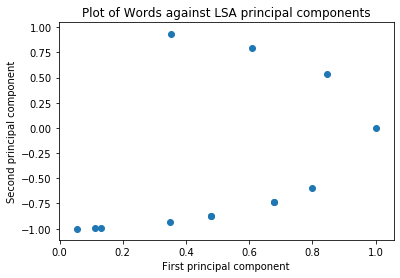

In [442]:
plt.figure()
plt.scatter(Vxs,Vys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Words against LSA principal components')
plt.show()

Populating the interactive namespace from numpy and matplotlib


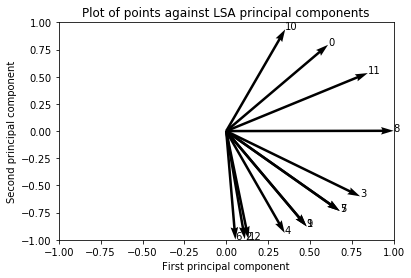

[(0, 'Machine learning is super fun'), (1, 'Python is super super cool'), (2, 'Statistics is cool too'), (3, 'Data science is fun'), (4, 'Python is great for machine learning'), (5, 'I like football'), (6, 'Football is great to watch')]


In [443]:
%pylab inline
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(Vxs, Vys))):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01, norm=True)
    ax.annotate('{}'.format(pos),xy=(vec[0], vec[1]),xytext=(vec[0], vec[1]))
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(example)))

In [444]:
#Compute vectors similarity using LSA components
Vsimilarity = np.asarray(numpy.asmatrix(components) * numpy.asmatrix(components).T)
pd.DataFrame(Vsimilarity,index=vectorizer.get_feature_names(), columns=vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
cool,1.000000,-0.403826,-0.720993,0.010345,-0.531210,-0.170679,-0.759023,-0.170679,0.610482,-0.403826,0.957126,0.938067,-0.705887
data,-0.403826,1.000000,0.925084,0.910609,0.989602,0.970337,0.902130,0.970337,0.478049,1.000000,-0.651514,-0.061867,0.933056
football,-0.720993,0.925084,1.000000,0.685446,0.970087,0.805833,0.998400,0.805833,0.108678,0.925084,-0.890807,-0.436267,0.999768
fun,0.010345,0.910609,0.685446,1.000000,0.841699,0.983508,0.643177,0.983508,0.798304,0.910609,-0.279754,0.356141,0.700984
great,-0.531210,0.989602,0.970087,0.841699,1.000000,0.925475,0.954808,0.925475,0.346746,0.989602,-0.753856,-0.204780,0.975095
learning,-0.170679,0.970337,0.805833,0.983508,0.925475,1.000000,0.771061,1.000000,0.676212,0.970337,-0.448782,0.181263,0.818412
like,-0.759023,0.902130,0.998400,0.643177,0.954808,0.771061,1.000000,0.771061,0.052293,0.902130,-0.915075,-0.486449,0.996949
machine,-0.170679,0.970337,0.805833,0.983508,0.925475,1.000000,0.771061,1.000000,0.676212,0.970337,-0.448782,0.181263,0.818412
python,0.610482,0.478049,0.108678,0.798304,0.346746,0.676212,0.052293,0.676212,1.000000,0.478049,0.354880,0.847075,0.130084
science,-0.403826,1.000000,0.925084,0.910609,0.989602,0.970337,0.902130,0.970337,0.478049,1.000000,-0.651514,-0.061867,0.933056


In [445]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"])

,component_1,component_2
Machine learning is super fun,0.957024,-0.290007
Python is super super cool,0.856484,0.516174
Statistics is cool too,0.563355,0.826215
Data science is fun,0.704171,-0.710030
Python is great for machine learning,0.717284,-0.696781
I like football,0.099136,-0.995074
Football is great to watch,0.235618,-0.971846


In [446]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.95702439393038,
  0.8564837097375544,
  0.563354891556387,
  0.7041710879980164,
  0.7172839034551719,
  0.09913638842634233,
  0.23561831047045295],
 [-0.29000742994307754,
  0.5161740549022169,
  0.8262150241671303,
  -0.7100303365544953,
  -0.6967810286195453,
  -0.9950738547915834,
  -0.9718456728159309])

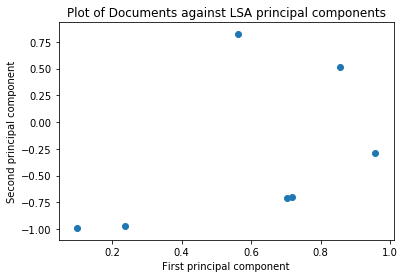

In [447]:
plt.figure()
plt.scatter(xs,ys)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Documents against LSA principal components')
plt.show()

Populating the interactive namespace from numpy and matplotlib


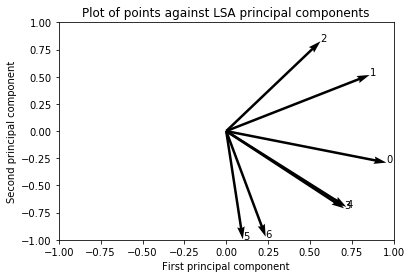

[(0, 'Machine learning is super fun'), (1, 'Python is super super cool'), (2, 'Statistics is cool too'), (3, 'Data science is fun'), (4, 'Python is great for machine learning'), (5, 'I like football'), (6, 'Football is great to watch')]


In [448]:
%pylab inline
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(xs, ys))):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01)
    ax.annotate('{}'.format(pos),xy=(vec[0], vec[1]),xytext=(vec[0], vec[1]))
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(example)))

In [449]:
#Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example, columns=example)

,Machine learning is super fun,Python is super super cool,Statistics is cool too,Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000,0.669981,0.299536,0.879823,0.888530,0.383455,0.507335
Python is super super cool,0.669981,1.000000,0.908975,0.236612,0.254682,-0.428723,-0.299838
Statistics is cool too,0.299536,0.908975,1.000000,-0.189940,-0.171606,-0.766296,-0.670217
Data science is fun,0.879823,0.236612,-0.189940,1.000000,0.999826,0.776342,0.855956
Python is great for machine learning,0.888530,0.254682,-0.171606,0.999826,1.000000,0.764458,0.846169
I like football,0.383455,-0.428723,-0.766296,0.776342,0.764458,1.000000,0.990417
Football is great to watch,0.507335,-0.299838,-0.670217,0.855956,0.846169,0.990417,1.000000
